## Machine Learning Algorithm Performance Metrics

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

#### 1. Classification Metrics

##### (1) Classification Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classification problems, it is also the most
misused. *It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important*,
which is often not the case.

In [11]:
# cross validation classification accuracy
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filename, names=names)
array = df.values
X = array[:,:-1]
Y = array[:,-1]
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LogisticRegression(max_iter=200)
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f'Accuracy: mean: {results.mean():.3f}, std: {results.std():.3f}')

Accuracy: mean: 0.772, std: 0.050


In [12]:
results

array([0.83116883, 0.74025974, 0.74025974, 0.80519481, 0.79220779,
       0.77922078, 0.66233766, 0.80519481, 0.82894737, 0.73684211])

##### (2) Logarithmic Loss

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the confidence of the prediction.

Logloss is also called cross-entropy loss.
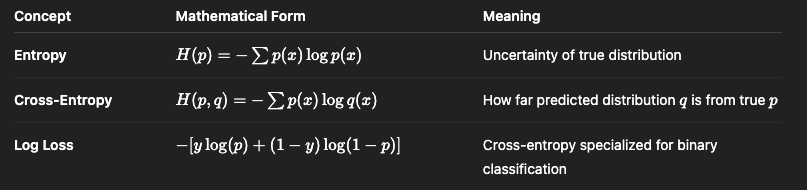

In [13]:
# cross validation classification logloss
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LogisticRegression(max_iter=200)
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f'Logloss: mean: {results.mean():.3f}, std: {results.std():.3f}')

Logloss: mean: -0.485, std: 0.057


In [14]:
results

array([-0.43621758, -0.55000485, -0.51992783, -0.43113636, -0.45809665,
       -0.45618816, -0.56575384, -0.41442859, -0.4520723 , -0.56989199])

In scikit-learn, the term “score” is used in a general sense to mean:

“A numeric quantity that measures model performance — higher is better.”

So:
- For accuracy, R², or precision, higher values = better → score = metric itself.
- For loss functions (like LogLoss or MSE), lower values = better → score = negative of the metric (so that higher is still better).

##### (3) Area Under ROC Curve

Area under ROC Curve (or **AUC** for short) is a performance metric for binary classification problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-oﬀ between **sensitivity** and **specificity**.
- Sensitivity is the **true positive rate** also called the **recall**. It is the number of instances from the positive (first) class that actually predicted correctly.
- Specificity is also called the **true negative rate**. Is the number of instances from the negative (second) class that were actual predicted correctly.

In [15]:
# cross validation classification ROC AUC
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LogisticRegression(max_iter=200)
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f'AUC: mean: {results.mean():.3f}, std: {results.std():.3f}')

AUC: mean: 0.829, std: 0.047


You can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions.

##### (4) Confusion Matrix

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis.

In [19]:
# cross validation classificiation confusion matrix
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[142  20]
 [ 34  58]]


Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

##### (5) Classification Report

The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The classification report() function displays the precision, recall, F1-score and support for each class.

In [21]:
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



#### 2. Regression Metrics

##### (1) Mean Absolute Error

The Mean Absolute Error (or MAE) is the sum of the absolute diﬀerences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

In [30]:
# cross validation regression MAE
filename = 'data/housing.csv'
df = pd.read_csv(filename)
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
temp = df.copy()
temp.dropna(inplace=True)
array = temp.values
X = array[:,:-2]
Y = array[:,-2]
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f'MAE: mean: {results.mean():.3f}, std: {results.std():.3f}')

MAE: mean: -50846.514, std: 971.386


##### (2) Mean Squared Error

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

In [47]:
# cross validation regression MSE
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f'MSE: mean: {results.mean():.3f}, std: {results.std():.3f}')
results_sqrt = np.sqrt(abs(results))
print(f'RMSE: mean: {results_sqrt.mean():.3f}, std: {results_sqrt.std():.3f}')

MSE: mean: -4860624552.615, std: 221526098.653
RMSE: mean: 69700.041, std: 1590.216


##### (3) $R^2$

The $R^2$ (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature this measure is called the *coeﬃcient of determination*.
This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [48]:
# cross valiation regression R^2
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(f'R^2: mean: {results.mean():.3f}, std: {results.std():.3f}')

R^2: mean: 0.634, std: 0.022
